In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 23 19:21:22 2020

@author: huaweisun
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# # roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import scipy.stats as stats
from scipy.stats import t
import statistics as stat
import math
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression


In [3]:
#(b) [15] Plot the ROC curve for the data (by hand drawing or using a Python notebook).
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


this is part 1(a): 
-----------------question 1------------------------
   Tuple# Class  Prob.  TP  FP  TN  FN  TPR  FPR
0       1     P   0.95   1   0   5   4  0.2  0.0
1       2     N   0.85   1   1   4   4  0.2  0.2
2       3     P   0.78   2   1   4   3  0.4  0.2
3       4     P   0.66   3   1   4   2  0.6  0.2
4       5     N   0.60   3   2   3   2  0.6  0.4
5       6     P   0.55   4   2   3   1  0.8  0.4
6       7     N   0.53   4   3   2   1  0.8  0.6
7       8     N   0.52   4   4   1   1  0.8  0.8
8       9     N   0.51   4   5   0   1  0.8  1.0
9      10     P   0.40   5   5   0   0  1.0  1.0


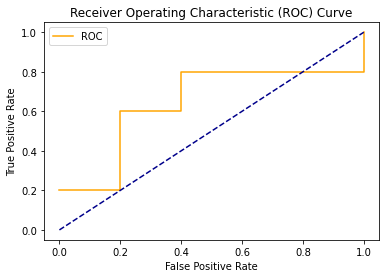

In [4]:
df = pd.read_csv("data.csv", delimiter="\t") 

print('this is part 1(a): ')
print("-----------------question 1------------------------")
print(df)
#plot for  ROC
plot_roc_curve(df['FPR'],df['TPR'])


In [5]:
#___________________this is questin 2______________________)
print("\n---------------------question 2----------------------")

#read data from cross-validation_data.csv
df1 = pd.read_csv("cross-validation_data.csv", delimiter=" ")
print(df1)

# set up X and Y for preparing training data
x=[]
for i in range (1, len(df1.loc[0])):
    x.append(df1.loc[0][i])
    
y=[]
for i in range (1, len(df1.loc[0])):
    y.append(df1.loc[1][i])

# get p_value
stat_value, p_value =stats.ttest_ind(x,y)
print(stats.ttest_ind(x,y))
print("since our significance level of 0.001")


#Perform a t-test at a significance level of 0.001 for each case to determine if one model is
#significantly better than the other. 
if(p_value < 0.001):
    print("we reject null hypothesis")
else:
    print("we cant reject null hypothesis")




---------------------question 2----------------------
  Models     1     2     3     4     5     6     7     8     9    10
0     M1  30.5  32.2  20.7  20.6  31.0  41.0  27.7  26.0  21.5  26.0
1     M2  22.4  14.5  22.4  19.6  20.7  20.4  22.1  19.4  16.2  35.0
Ttest_indResult(statistic=2.437567141225827, pvalue=0.02538670824824204)
since our significance level of 0.001
we cant reject null hypothesis


In [9]:
#this is question 3

print("\n\n-----------------this is question 3 -----------------------")
df3 = pd.read_csv("hwk07.csv")

#model for gaussianmodel
#model for adaboostmodel
GaussianModel = []
AdaBoostModel = []

X = df3.drop("H", axis = 1)
y = df3['H']
#make arraay
X =X.to_numpy()
y = y.to_numpy()
#training for 50 percent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
#get misslabeled point
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))



GaussianAccurcy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
GaussianModel.append(GaussianAccurcy)



# Create adaboost classifer object
abc = AdaBoostClassifier()
model = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Number of mislabeled points out of a total %d points in ads: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



AdaBoostModel.append(metrics.accuracy_score(y_test, y_pred))

print("\n\nafter 10-cross-validation")
#prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = abc
print("print out model for abs and 10 cross-validation: model =", model)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(' AdaBoost model Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


# create model

model = gnb
print("print out model for abs and 10 cross-validation: model =", model)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Gaussia Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))







-----------------this is question 3 -----------------------
Number of mislabeled points out of a total 250 points : 27
Accuracy: 0.892
Number of mislabeled points out of a total 250 points in ads: 95
Accuracy: 0.62


after 10-cross-validation
print out model for abs and 10 cross-validation: model = AdaBoostClassifier()
 AdaBoost model Accuracy: 0.824 (0.128)
print out model for abs and 10 cross-validation: model = GaussianNB()
Gaussia Accuracy: 0.924 (0.027)
